**Part 1- Feature extraction**

In [ ]:
# ! pip install opencv-python
# ! pip install imutils
# ! pip install google-colab
# ! pip install opencv-contrib-python

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


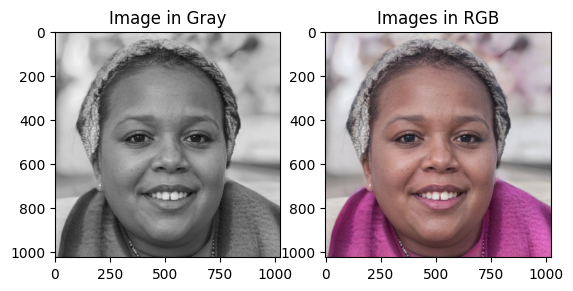

In [17]:
# Read the original image pic1 and create a regular plus a gray version of it.
# The result should be similar to what you see in instrcutions
f = plt.figure()
f.add_subplot(1, 2, 1)

# Reading file from local storage
img_bgr = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer vision/Assignment4_pic1.jpg")
# convert to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# convert to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


# plot original image
plt.imshow(img_gray, cmap='gray')
plt.axis("on")
plt.title("Image in Gray")

# plot grayscale image
f.add_subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title("Images in RGB")
plt.show()

In [ ]:
# store and write gray image locally
cv2.imwrite("pic1_gray.jpg", img_gray)

True

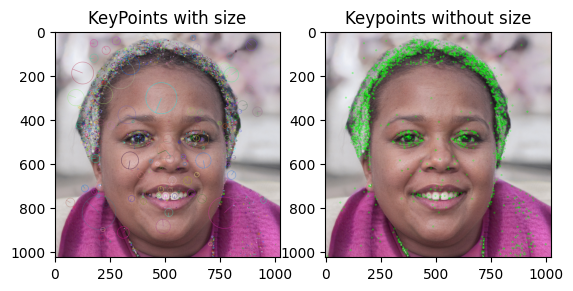

In [18]:
#a- SIFT
sift = cv2.SIFT_create()
# Find detect and compute function and apply it on top of sift
original_keypoints, original_descriptor = sift.detectAndCompute(img_gray, None)
keypoints_without_size = np.copy(img_rgb)
# You need some more codes

# Draw keypoints with size
keypoints_with_size = np.copy(img_gray)

# Draw the result here
result1 = cv2.drawKeypoints(img_rgb, original_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img_rgb, original_keypoints, keypoints_without_size, color = (0, 255, 0))

f = plt.figure()
# Plot the result
f.add_subplot(1, 2, 1)
plt.imshow(result1)
plt.title("KeyPoints with size")
plt.axis("on")

f.add_subplot(1, 2, 2)
plt.imshow(result2)
plt.title("Keypoints without size")
plt.show()

In [ ]:
# Explain your understanding here

Function which draws the small green circles on the locations of keypoints without size.  
When passing cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS to it, it will draw a circle with size of keypoint and it will even show its orientation.

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  7051
Threshold:  10
nonmaxSuppression:  False
neighborhood:  2
Total Keypoints with nonmaxSuppression:  27512


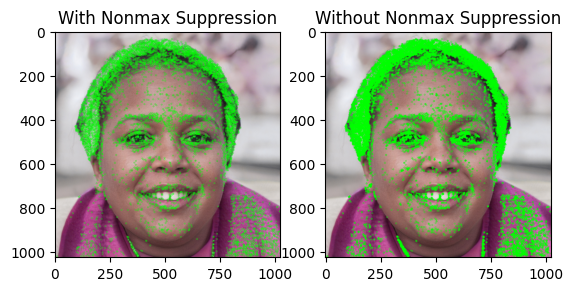

In [ ]:
# b- FAST
fast_w_nonmax = cv2.FastFeatureDetector_create(nonmaxSuppression=True)
fast_wo_nonmax = cv2.FastFeatureDetector_create(nonmaxSuppression=False)

# Find detect and compute function and apply it on top of fast
# find the keypoints on image (grayscale)
keypoints_with_nonmax = fast_w_nonmax.detect(img_gray, None)
keypoints_without_nonmax = fast_wo_nonmax.detect(img_gray, None)

# Copy of image to draw keypoints on image
image_with_nonmax = np.copy(img_rgb)
image_nonmax = cv2.drawKeypoints(image_with_nonmax, keypoints_with_nonmax, None, color = (0, 255, 0))

image_wo_nonmax = np.copy(img_rgb)
image_wo_nonmax = cv2.drawKeypoints(image_wo_nonmax, keypoints_without_nonmax, None, color = (0, 255, 0))

# Print all default params
print("Threshold: ", fast_w_nonmax.getThreshold())
print("nonmaxSuppression: ", fast_w_nonmax.getNonmaxSuppression())
print("neighborhood: ", fast_w_nonmax.getType())
print("Total Keypoints with nonmaxSuppression: ", len(keypoints_with_nonmax))

# Print all default params
print("Threshold: ", fast_wo_nonmax.getThreshold())
print("nonmaxSuppression: ", fast_wo_nonmax.getNonmaxSuppression())
print("neighborhood: ", fast_wo_nonmax.getType())
print("Total Keypoints with nonmaxSuppression: ", len(keypoints_without_nonmax))

# Draw the result
# Use above approach to create result 1 and result 2 and draw them
f = plt.figure()
# Plot the result
f.add_subplot(1, 2, 1)
plt.imshow(image_nonmax)
plt.title("With Nonmax Suppression")
plt.axis("on")

f.add_subplot(1, 2, 2)
plt.imshow(image_wo_nonmax)
plt.title("Without Nonmax Suppression")
plt.show()


In [ ]:
# Explain your understanding here:

The nonmaxSuppression parameter is used to remove the keypoints that are close to each other.  
This allows for fewer keypoints and bounding boxes to be drawn on the image.

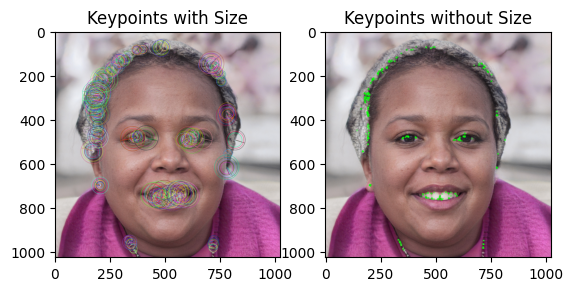

In [19]:
# c- ORB
orb = cv2.ORB_create()
# gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
original_keypoints, original_descriptor = orb.detectAndCompute(img_gray, None)
query_keypoints, query_descriptor = orb.detectAndCompute(img_gray, None)

keypoints_without_size = np.copy(img_rgb)
img_wo_kp = cv2.drawKeypoints(keypoints_without_size, original_keypoints, None, color = (0, 255, 0))

keypoints_with_size = np.copy(img_rgb)
img_w_kp = cv2.drawKeypoints(keypoints_with_size, query_keypoints, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Draw the result
f = plt.figure()
# Plot the result
f.add_subplot(1, 2, 1)
plt.imshow(img_w_kp)
plt.title("Keypoints with Size")
plt.axis("on")

f.add_subplot(1, 2, 2)
plt.imshow(img_wo_kp)
plt.title("Keypoints without Size")
plt.show()

In [ ]:
# Explain your understanding here:


ORB is a feature detection algorithm that combines FAST keypoint detector and BRIEF descriptor with some modifications. When using the flag it is easier to see the feature and descriptors, without it, you can only see the keypoints in green but without much size.

The number of matching keypoints between the original and the query image is 500



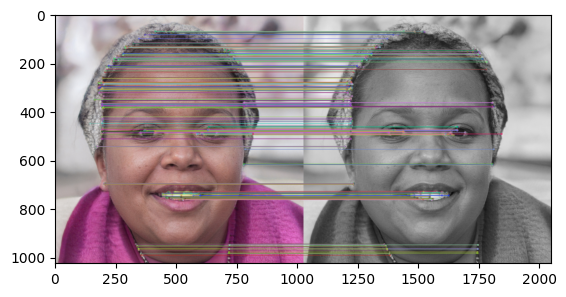

In [20]:
#d- Finding the matching points
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = brute_force.match(original_descriptor, query_descriptor)
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(img_rgb, original_keypoints, img_gray, query_keypoints, matches, img_gray, flags = 2)
plt.imshow(result)
print("The number of matching keypoints between the original and the query image is {}\n".format(len(matches)))

In [ ]:
# Explain your understanding here. What is the goal of this matching point?

BFMatcher is a brute force approach to match the keypoints on the gray image with the keypoints on the query or colorful image.

**Part 2- Face recognition**

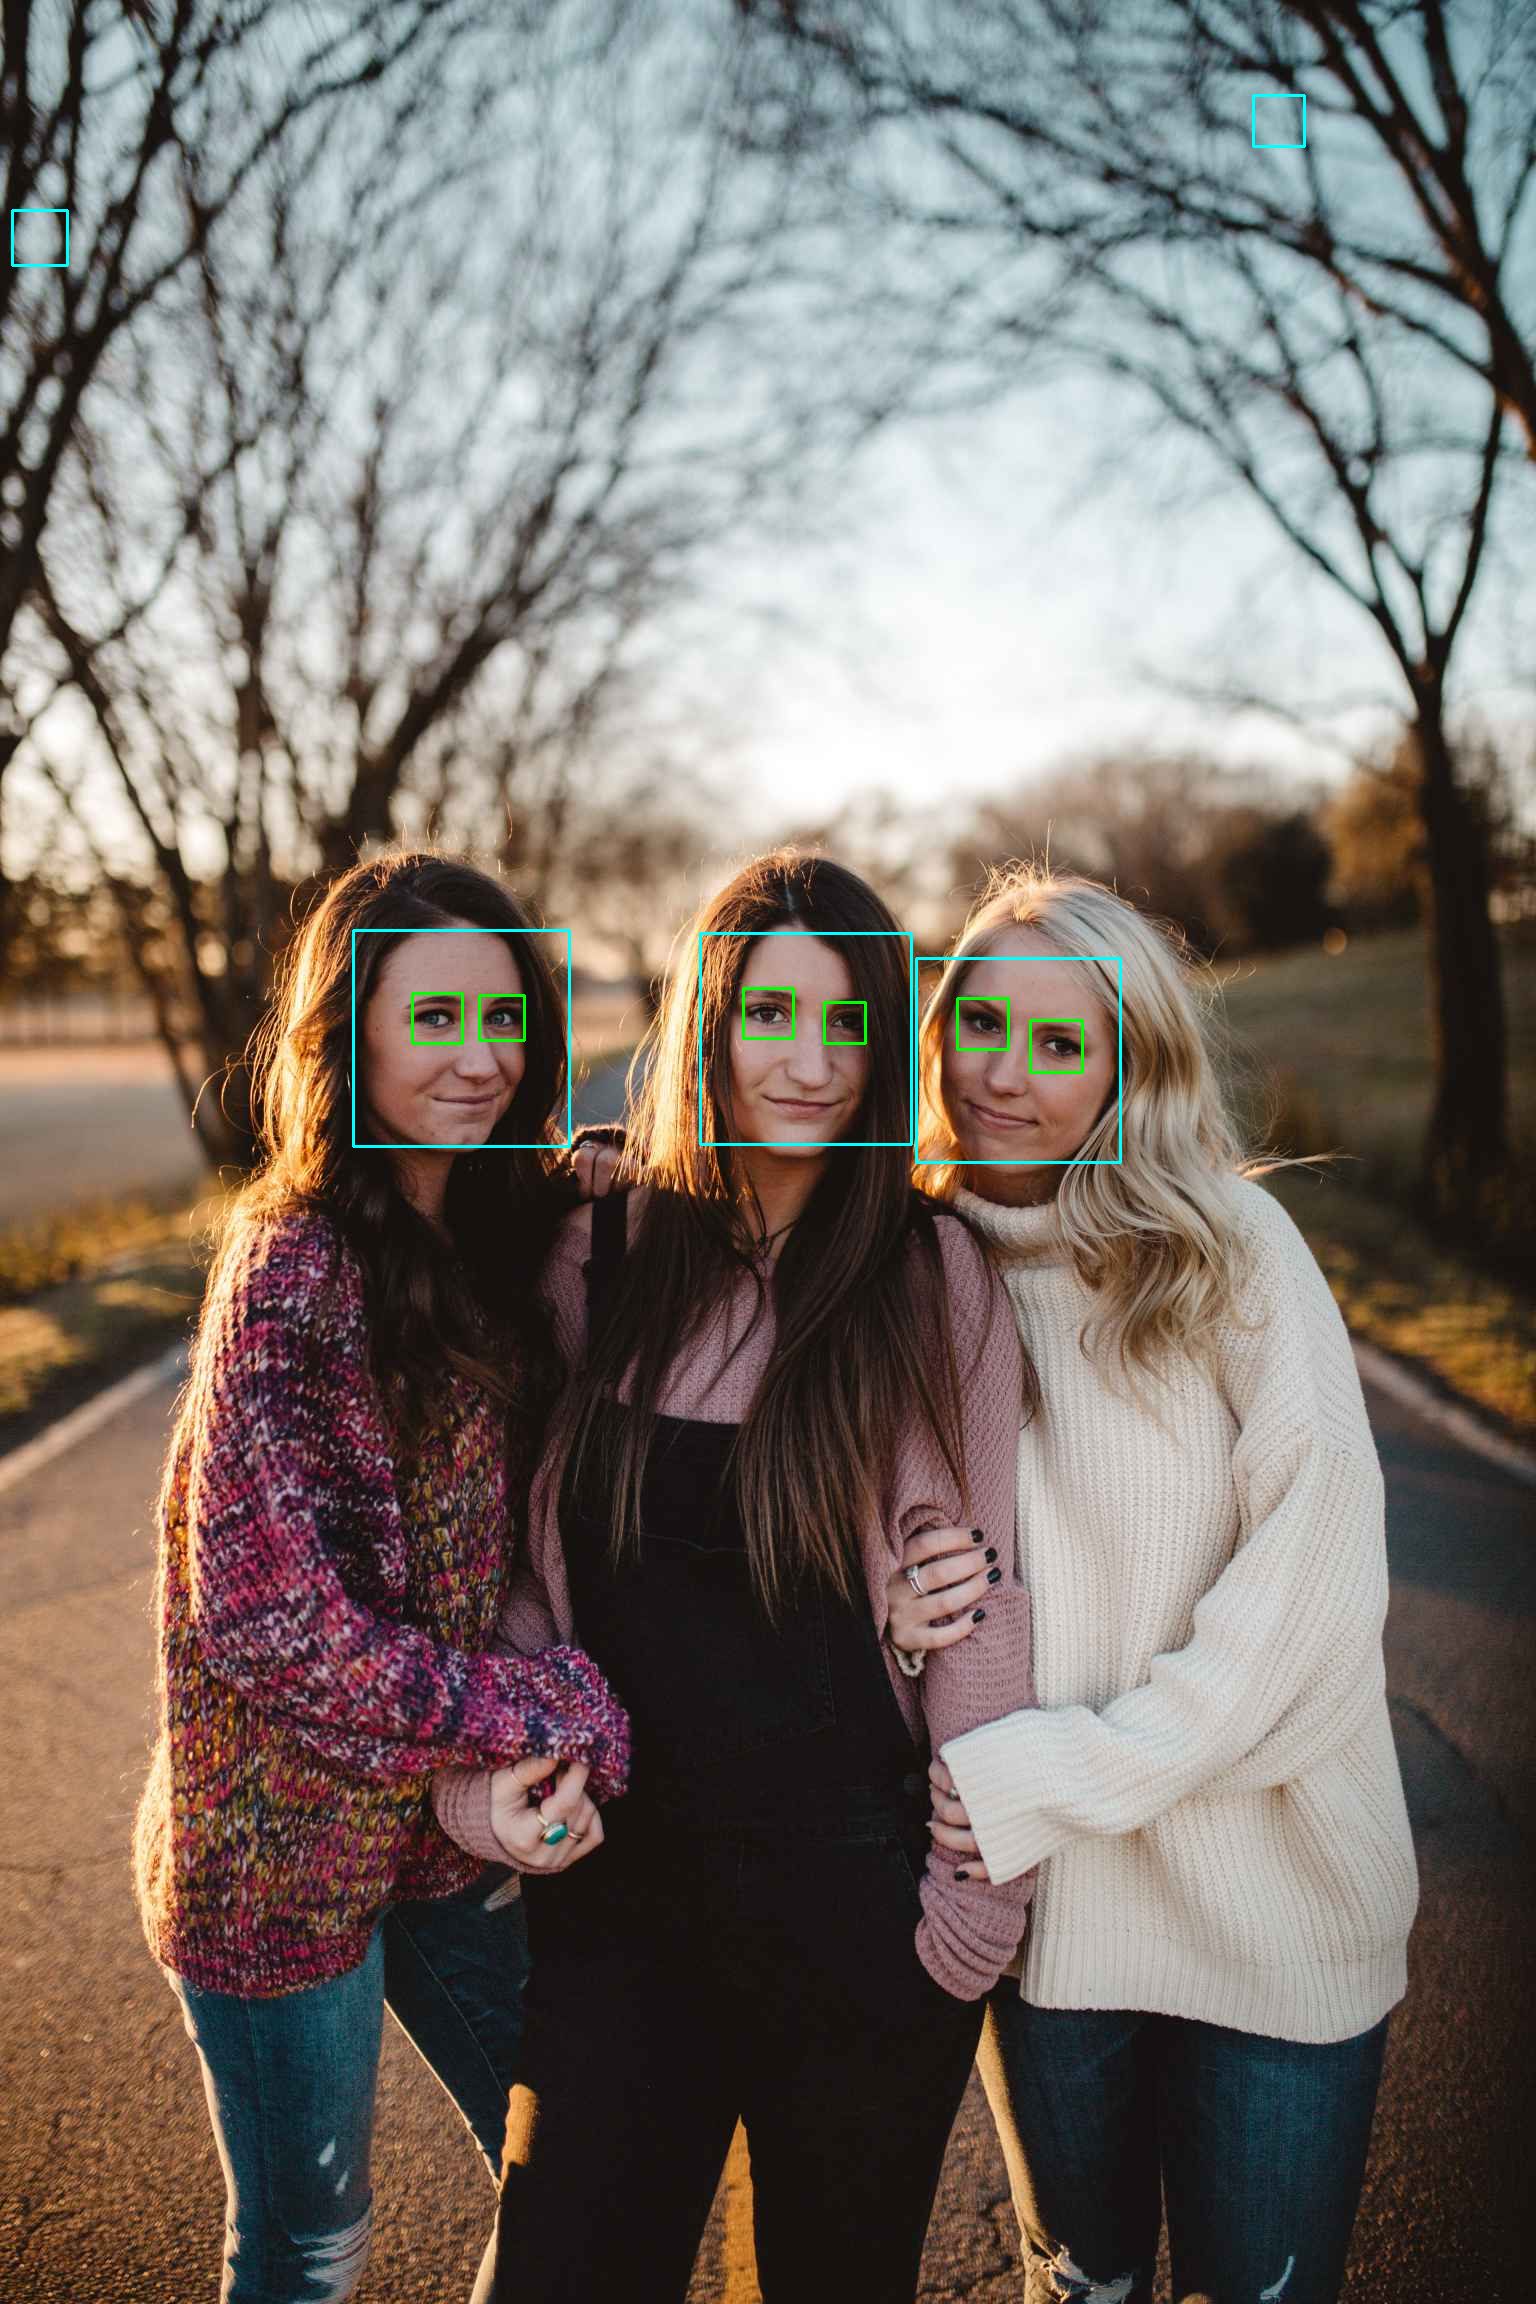

In [3]:
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/computer vision/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/computer vision/haarcascade_eye.xml")

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer vision/Assignment4_pic2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

cv2_imshow(img)

In [4]:
#b- Working on webcam
#Function to activate your laptop cam. This function is comp;ete and you don't need to do anything.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

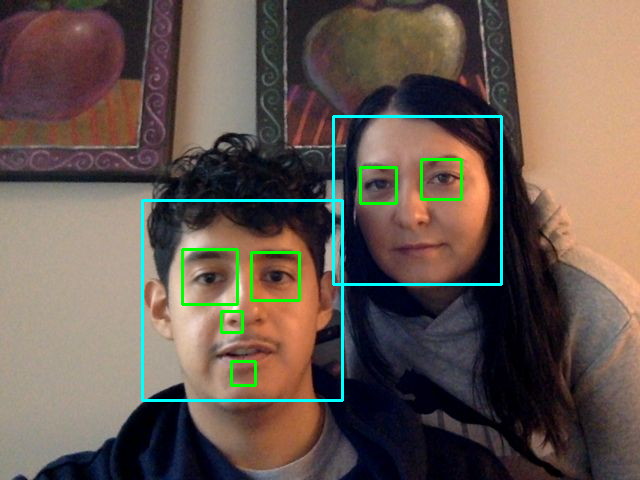

In [8]:
# Here we call the function and open the camera
# Call function and open the camera
image_file = take_photo('steve.jpg')

#Show the read image
# image = cv2_imshow(image_file)
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#Repeat the above code to detect the face and eyes in your image
# Here you should see your image while the face and eyes are detected
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

cv2_imshow(img)

**Part 3- Parameter detection**

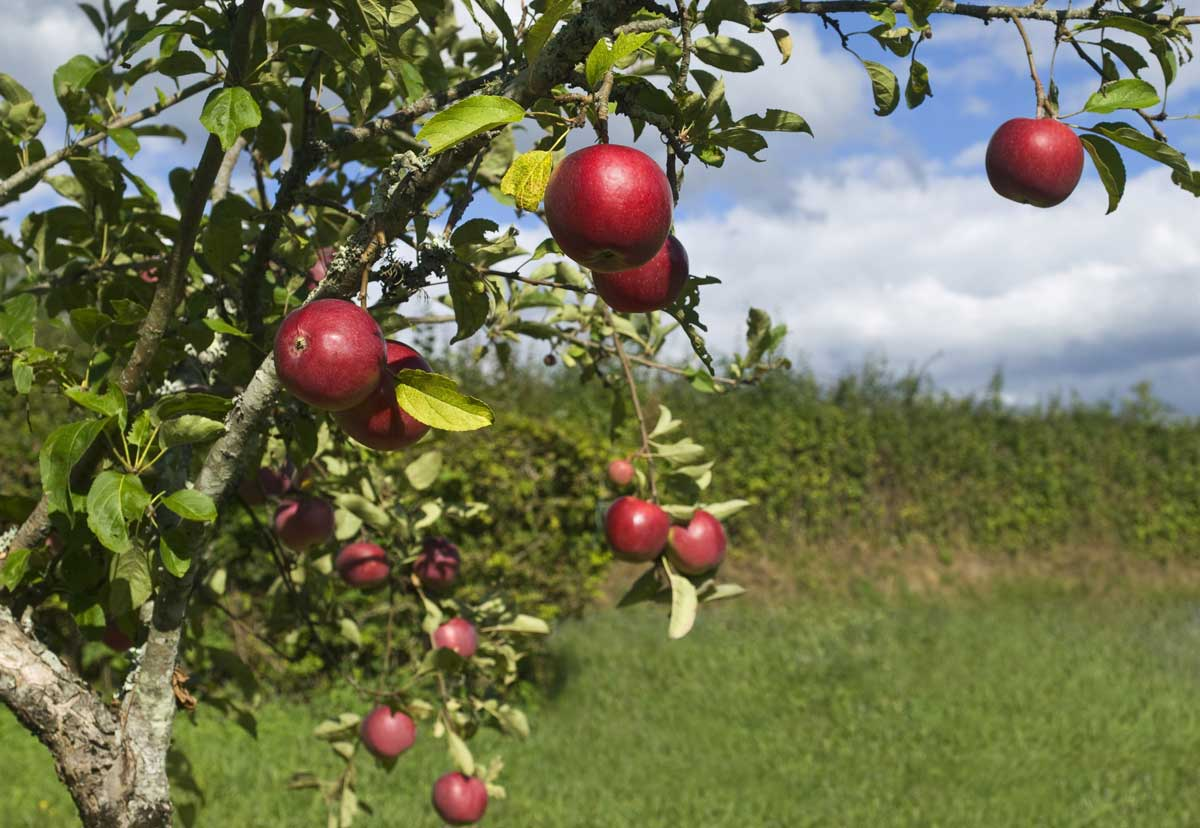

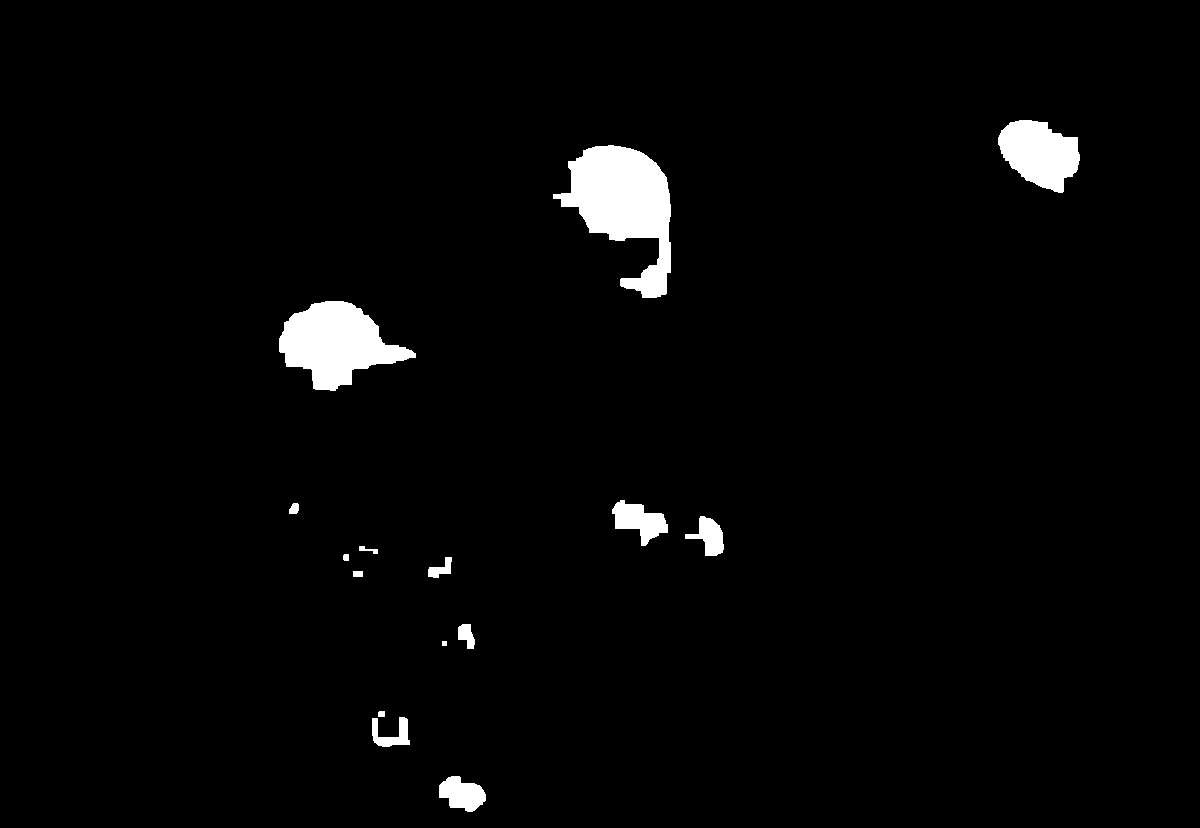

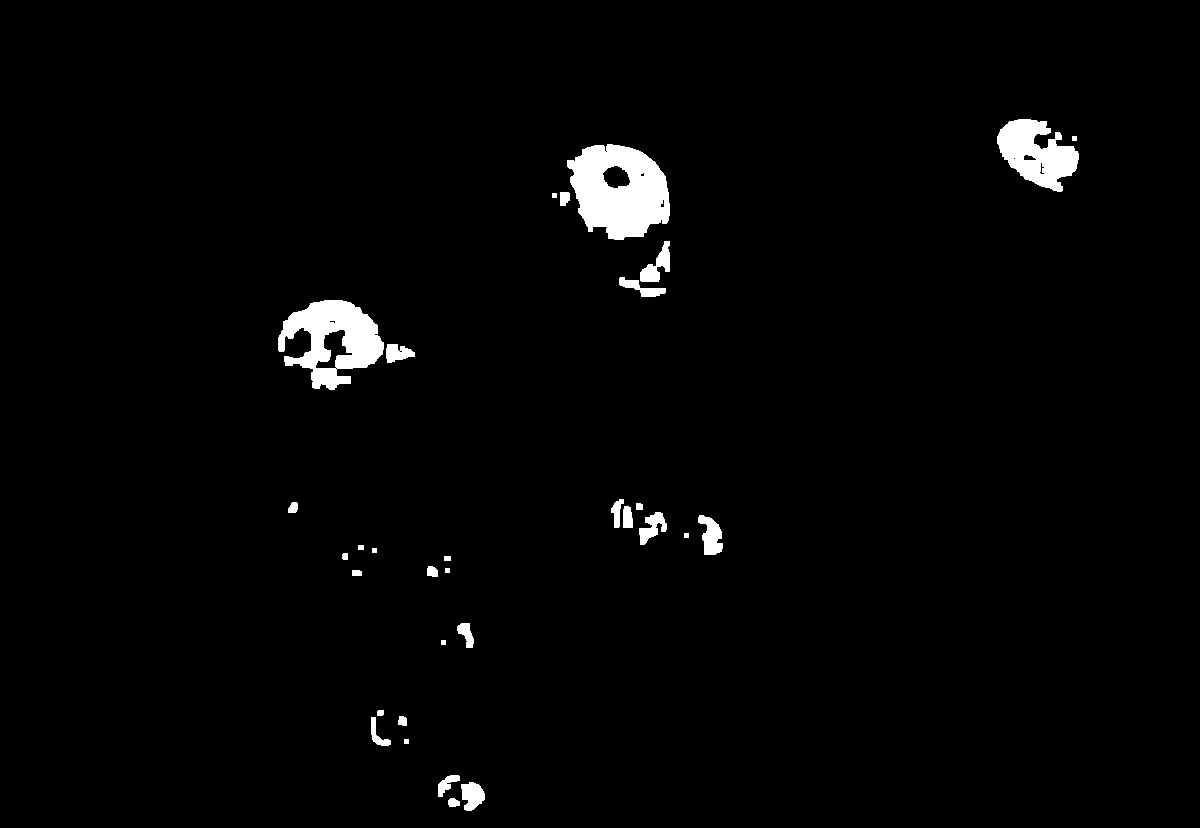

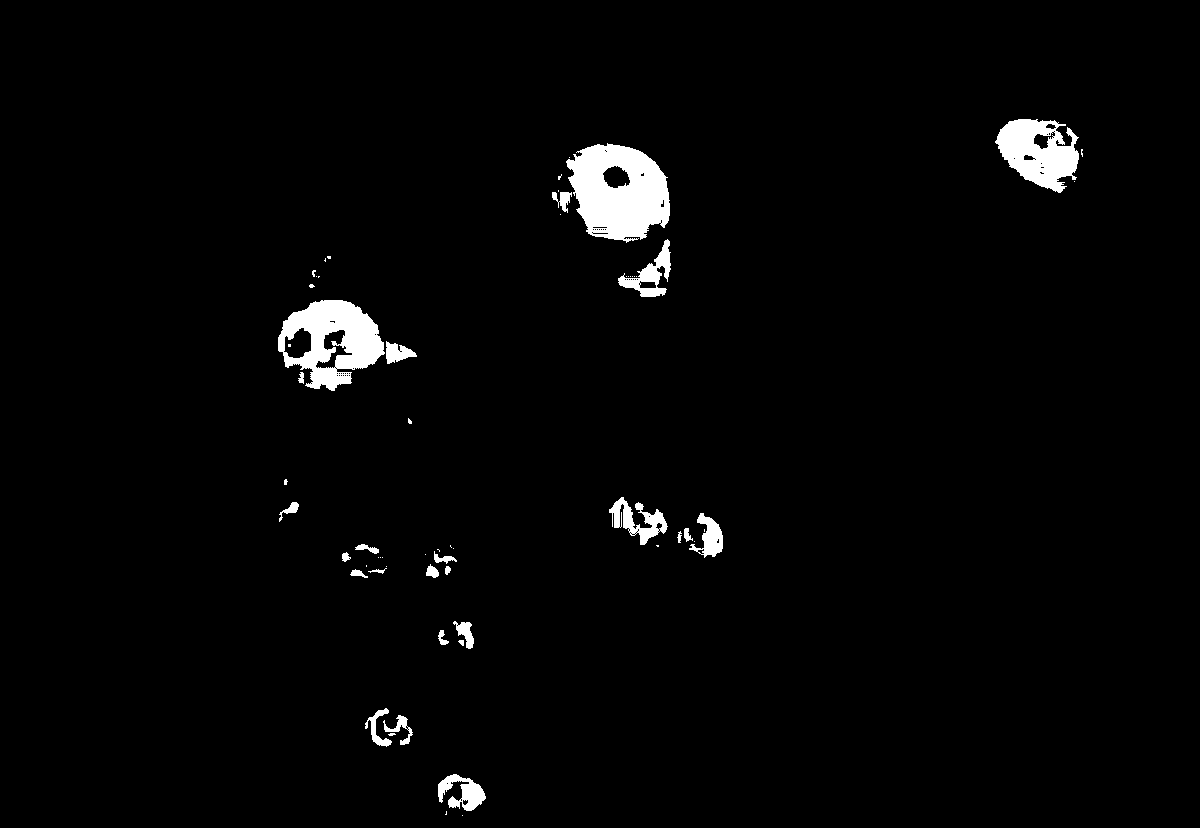

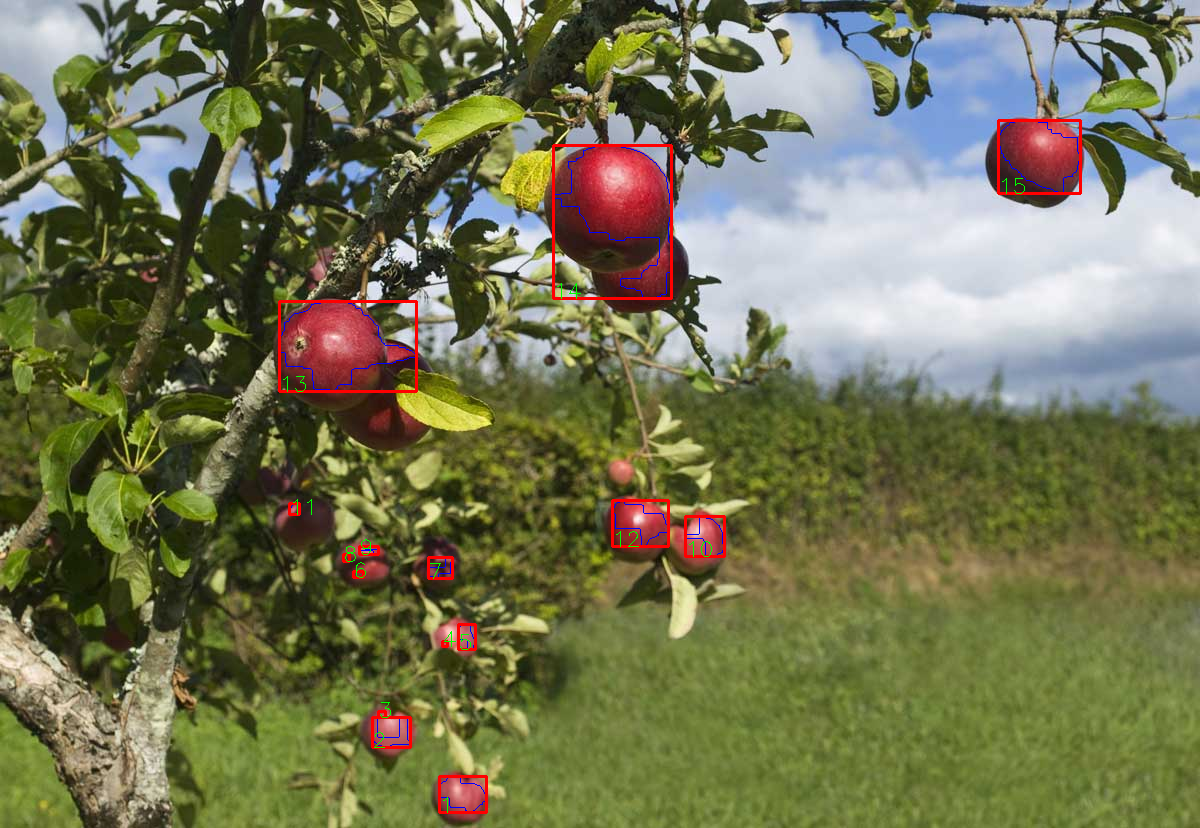

In [9]:
lowerBound=np.array([170,100,80])
upperBound=np.array([180,256,256])

#cam= cv2.VideoCapture(0)
kernelOpen=np.ones((5,5))
kernelClose=np.ones((20,20))

font = cv2.FONT_HERSHEY_SIMPLEX

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/computer vision/apple.jpg')

#convert BGR to HSV
imgHSV= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# Show this image
cv2_imshow(img)

# create the Mask
mask=cv2.inRange(imgHSV,lowerBound,upperBound)
#morphology
maskOpen=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)

maskFinal=maskClose
conts,h=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img,conts,-1,(255,0,0),1)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0))

cv2_imshow(maskClose)
cv2_imshow(maskOpen)
cv2_imshow(mask)
cv2_imshow(img)

In [12]:
print( 'There were', len(conts) ,'apples in this picture') #Print number of apples

There were 15 apples in this picture


In [21]:
# Colab2PDF v1.0.2 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>